- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# All Chromosomes

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.externals import joblib
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here

In [2]:
iterationNumber = 2

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_01': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21012~A.0019.K.1L

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_01']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21012~A.0019.K.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21486~A.0020.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21563~A.0006.K.jpg.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21570~A.0001.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21587~A.0010.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21587~A.0010.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21890~A.0005.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21902~A.0010.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\D

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_01': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.bmp',
  'D:\\

# Iteration Starts Here:

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  2
chr_01
   Train: 
        w21001~A.0008.K.1L.bmp
        w21001~A.0008.K.1R.bmp
        w21002~A.0024.K.jpg.1R.bmp
        w21008~A.0008.K.jpg.1L.bmp
        w21008~A.0008.K.jpg.1R.bmp
        W21012~A.0019.K.1L.bmp
        W21012~A.0019.K.1R.bmp
        W21014~A.0005.K.1L.bmp
        W21014~A.0005.K.1R.bmp
        W21022~A.0007.K.jpg.1L.bmp
        W21022~A.0007.K.jpg.1R.bmp
        W21025~A.0002.K.jpg.1L.bmp
        W21025~A.0002.K.jpg.1R.bmp
        W21027~A.0003.K.1R.bmp
        W21486~A.0020.K.jpg.1L.bmp
        W21486~A.0020.K.jpg.1R.bmp
        W21486~A.0020.K.jpg.2L.bmp
        W21486~A.0020.K.jpg.2R.bmp
        W21559~A.0005.1L.bmp
        W21563~A.0006.K.1R.bmp
        W21563~A.0006.K.jpg.bmp
        W21570~A.0001.K.jpg.1L.bmp
        W21570~A.0001.K.jpg.1R.bmp
        W21576~A.0010.K.jpg.1L.bmp
        W21576~A.0010.K.jpg.1R.bmp
        W21587~A.0008.K.jpg.1L.bmp
        W21587~A.0008.K.jpg.1R.bmp
        W21587~A.0010.K.jpg.1L.bmp
        W21587~A.0010.K.jp

        W22455~A.0002.K.jpg.22L.bmp
        W22455~A.0002.K.jpg.22R.bmp
        W22666-1.0002.K.jpg.22L.bmp
        W22666-1.0002.K.jpg.22R.bmp
        W22670~A.0006.K.jpg.22L.bmp
        W22670~A.0006.K.jpg.22R.bmp
        W22672~A.0004.K.jpg.22L.bmp
        W22672~A.0004.K.jpg.22R.bmp
        w22881~A.0017.K.jpg.22L.bmp
        W23070~A.0001.K.jpg.22L.bmp
        W23075-1~A.0017.K.jpg.22L.bmp
        W23075-1~A.0017.K.jpg.22R.bmp
        W23082.0026.K.jpg.22L.bmp
        W23084~A.0003.K.jp.22L.bmp
        W23084~A.0003.K.jp.22R.bmp
   Test: 
        w21000~A.0001.K.jpg.22L.bmp
        W21011~A.0008.K.22L.bmp
        W21012~A.0019.K.22L.bmp
        W21014~A.0005.K.22R.bmp
        W21022~A.0007.K.jpg.22R.bmp
        W21025~A.0002.K.jpg.22R.bmp
        W21027~A.0003.K.22R.bmp
        W21563~A.0006.K.22L.bmp
        W21570~A.0001.K.jpg.22L.bmp
        W21902~A.0010.K.jpg.22L.bmp
        W21906~A.0011.K.jpg.22L.bmp
        w22881~A.0017.K.jpg.22R.bmp
        W23070~A.0001.K.jpg.22R.bmp
  

### 3.1.1. Helper Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [9]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

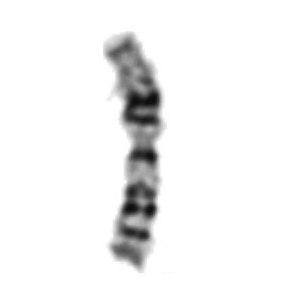

In [10]:
image['chr_01'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [11]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Train 2D to 1D

In [12]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [13]:
x_train_list = []
y_train_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Test 2D to 1D

In [16]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [17]:
x_test_list = []
y_test_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
               
               }

In [19]:
chromConvert_reverse = {1: 'chr_01',
                2: 'chr_02', 
                3: 'chr_03',
                4: 'chr_04',
                5: 'chr_05', 
                6: 'chr_06',
                7: 'chr_07',
                8: 'chr_08',
                9: 'chr_09',
                10: 'chr_10',
                11: 'chr_11',
                12: 'chr_12',
                13: 'chr_13',
                14: 'chr_14',
                15: 'chr_15',
                16: 'chr_16',
                17: 'chr_17',
                18: 'chr_18',
                19: 'chr_19',
                20: 'chr_20', 
                21: 'chr_21', 
                22: 'chr_22', 
                0: 'chr_x', 
                23: 'chr_y', 
              
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12

In [24]:
len(X_train)

1938

In [25]:
X_train[0].shape

(90000,)

## 3.2. Support Vector Machine

In [26]:
start = time.time()

clf = svm.SVC(kernel='linear', decision_function_shape='ovo')
clf.fit(X_train, y_train)

end = time.time()

In [27]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-8.67361738e-19 -8.67361738e-19 -8.67361738e-19 ... -8.67361738e-19
  -8.67361738e-19 -8.67361738e-19]
 [-1.73472348e-18 -1.73472348e-18 -1.73472348e-18 ... -1.73472348e-18
  -1.73472348e-18 -1.73472348e-18]
 [ 8.67361738e-19  8.67361738e-19  8.67361738e-19 ...  8.67361738e-19
   8.67361738e-19  8.67361738e-19]]
b =  [-15.93296588 -11.89453761  -6.9120298   -2.08697487  -3.58803846
   2.04657432   6.02051526   8.45146071  26.92338968   8.02896387
   5.21131106   4.94520606   4.77824307   5.84793133   6.89534764
  14.60608404   8.34554573   8.01134982   8.26510779   6.56408546
   8.10400535   7.70655837   7.06550336  -4.62688067  11.02082442
   6.97694626   6.230446

## 3.8 Save the Model

In [28]:
c = joblib.dump(clf, 'model_allClass_svm_iteration_'+str(iterationNumber))
print(c)

C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-pac

['model_allClass_svm_iteration_2']


C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-pac

## 3.9 Load the Model

In [29]:
model_reload = joblib.load('model_allClass_svm_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [30]:
acc = model_reload.score(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.874


In [31]:
len(X_test)

486

In [32]:
y_predict = model_reload.predict(X_test)

In [33]:
len(y_predict)

486

In [34]:
y_predict[0]

1

In [35]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(24):        
        if sample > maximum:
            maximum = sample
            indicator = i
    y_predict_filtered.append(indicator)        

In [36]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y']

label_convert = []

for i in range(24):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [37]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [38]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [39]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [40]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    a = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    b = np.load(f2)

In [41]:
a

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12

In [42]:
b

array([ 1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  2,
        1,  2,  1,  2,  2,  1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  5,
        5,  5,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  7,  6,  6,  7,  9,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  0,  7,  8,  8,  8,  8,  8,  9,  8,  8,  8,  8,  8,
       23,  8,  8,  9,  9,  9,  9,  9,  9,  0,  9,  9,  6,  9,  9,  9,  9,
        9,  9, 12,  0, 10,  0,  9,  9,  9,  9,  9,  0,  8,  0,  9,  9,  9,
        9,  9,  9, 16,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  0,  9, 10, 10, 10,  5, 10, 10, 10, 10, 10, 10, 10,  8, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  9, 11, 11, 12, 12,
       12, 12, 12, 12, 12

### 3.10.2. Classification Report

In [43]:
performanceReport = classification_report(y_test, y_predict, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport)

              precision    recall  f1-score   support

       chr_x       0.82      0.82      0.82        38
      chr_01       0.76      0.87      0.81        15
      chr_02       0.83      0.71      0.77        14
      chr_03       1.00      1.00      1.00        14
      chr_04       0.81      0.93      0.87        14
      chr_05       0.95      0.93      0.94        40
      chr_06       0.93      0.93      0.93        14
      chr_07       0.86      0.86      0.86        14
      chr_08       0.80      0.86      0.83        14
      chr_09       0.85      0.79      0.82        52
      chr_10       0.86      0.86      0.86        14
      chr_11       1.00      0.93      0.96        14
      chr_12       0.88      1.00      0.93        14
      chr_13       1.00      0.79      0.88        14
      chr_14       0.69      0.79      0.73        14
      chr_15       0.79      0.79      0.79        14
      chr_16       0.85      0.79      0.81        14
      chr_17       1.00    

### 3.10.3. Confusion Matrix

In [44]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_14,chr_15,chr_16,chr_17,chr_18,chr_19,chr_20,chr_21,chr_22,chr_y
chr_x,31,0,0,0,0,0,0,1,1,4,...,0,0,0,0,0,0,0,0,0,0
chr_01,0,13,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,0,4,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_04,0,0,0,0,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,0,0,0,0,3,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_06,0,0,0,0,0,0,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_07,1,0,0,0,0,0,0,12,0,1,...,0,0,0,0,0,0,0,0,0,0
chr_08,0,0,0,0,0,0,0,0,12,1,...,0,0,0,0,0,0,0,0,0,1
chr_09,6,0,0,0,0,0,1,0,1,41,...,0,0,1,0,0,0,0,0,0,0


### 3.10.4 Rate of Confusion Matrix

In [45]:
subtotal = [0] * 24
for item in y_test:
    subtotal[item] = subtotal[item] + 1

In [46]:
cm_r = []
for i in range(24):
    cm_r.append(cm[i]/subtotal[i])

In [47]:
cm_array = np.array(cm_r)

In [48]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion_r.to_csv('ConfusionMatrix_Rate_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion_r

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_14,chr_15,chr_16,chr_17,chr_18,chr_19,chr_20,chr_21,chr_22,chr_y
chr_x,0.815789,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.026316,0.026316,0.105263,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
chr_01,0.000000,0.866667,0.133333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
chr_02,0.000000,0.285714,0.714286,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
chr_03,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
chr_04,0.000000,0.000000,0.000000,0.0,0.928571,0.071429,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
chr_05,0.000000,0.000000,0.000000,0.0,0.075000,0.925000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
chr_06,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.928571,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
chr_07,0.071429,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.857143,0.000000,0.071429,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
chr_08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.857143,0.071429,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.071429
chr_09,0.115385,0.000000,0.000000,0.0,0.000000,0.000000,0.019231,0.000000,0.019231,0.788462,...,0.000000,0.000000,0.019231,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


#### Heat Map: Number

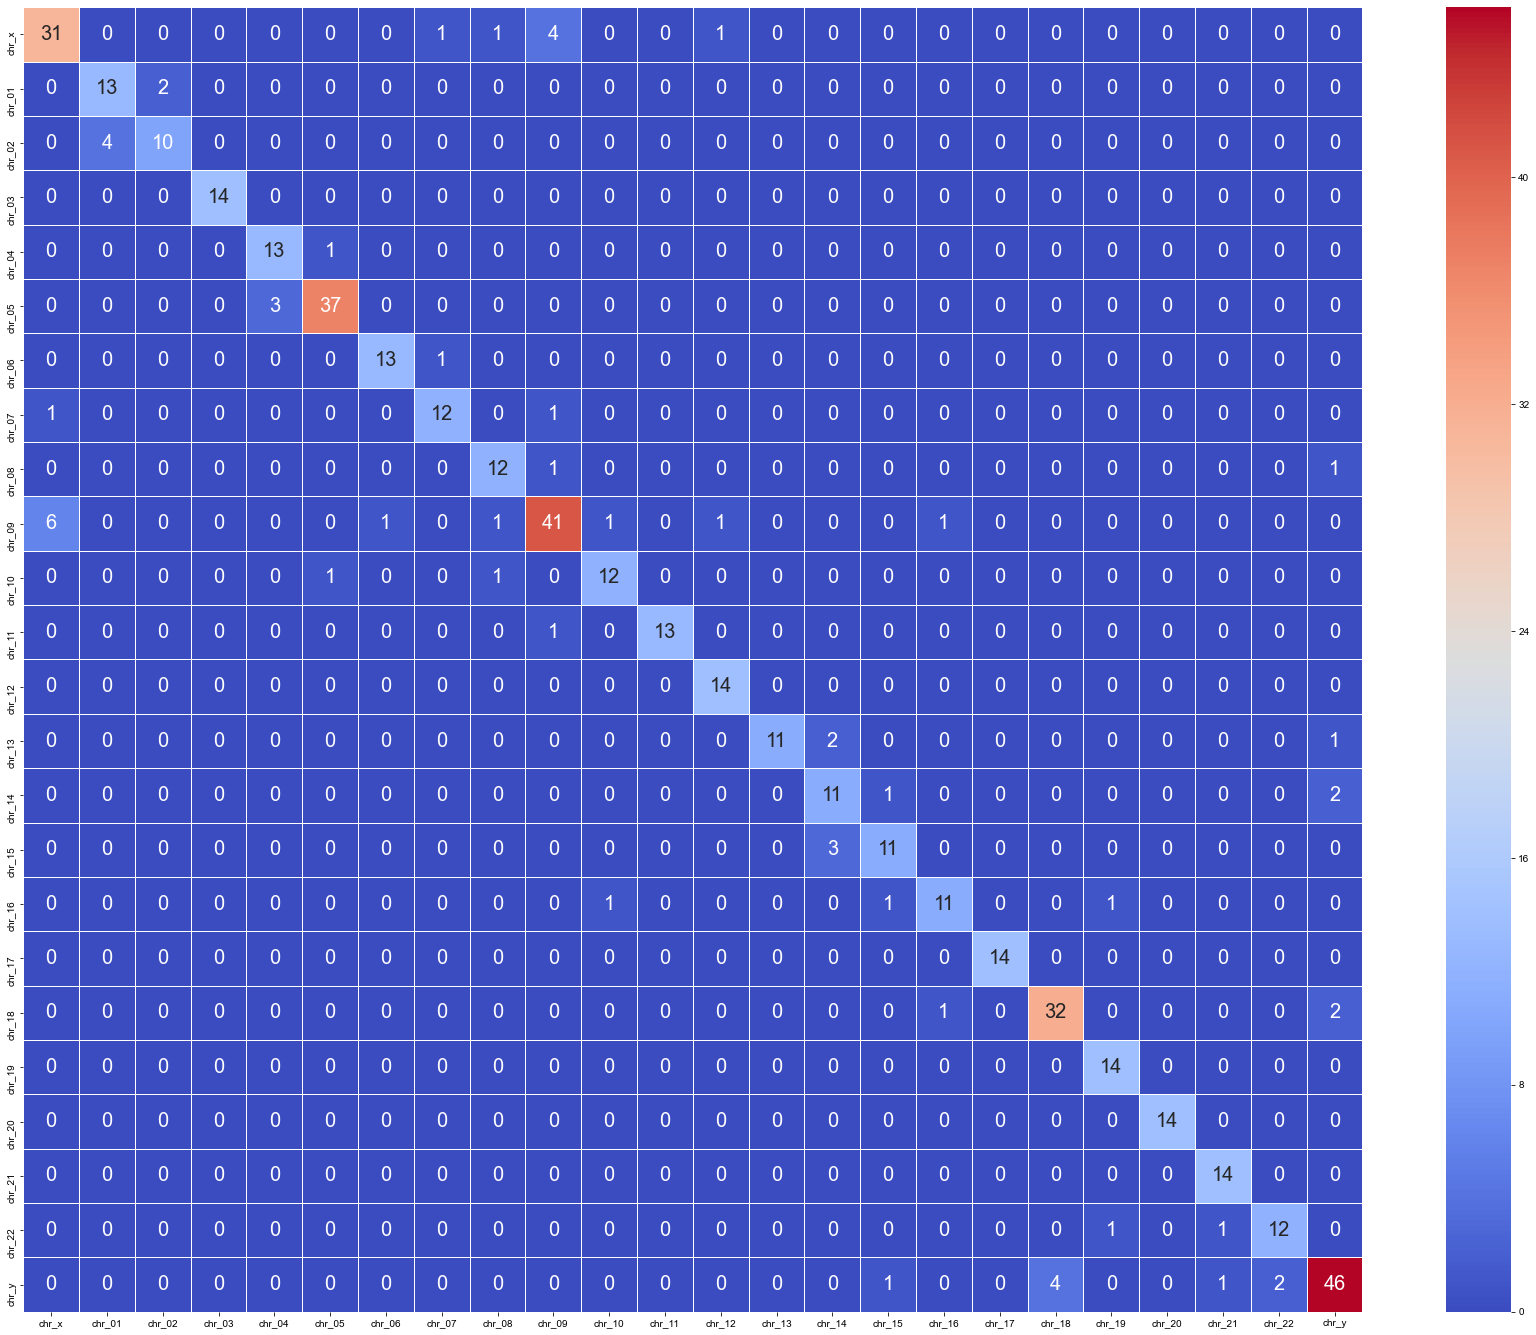

In [49]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map: Rate (important!!!)

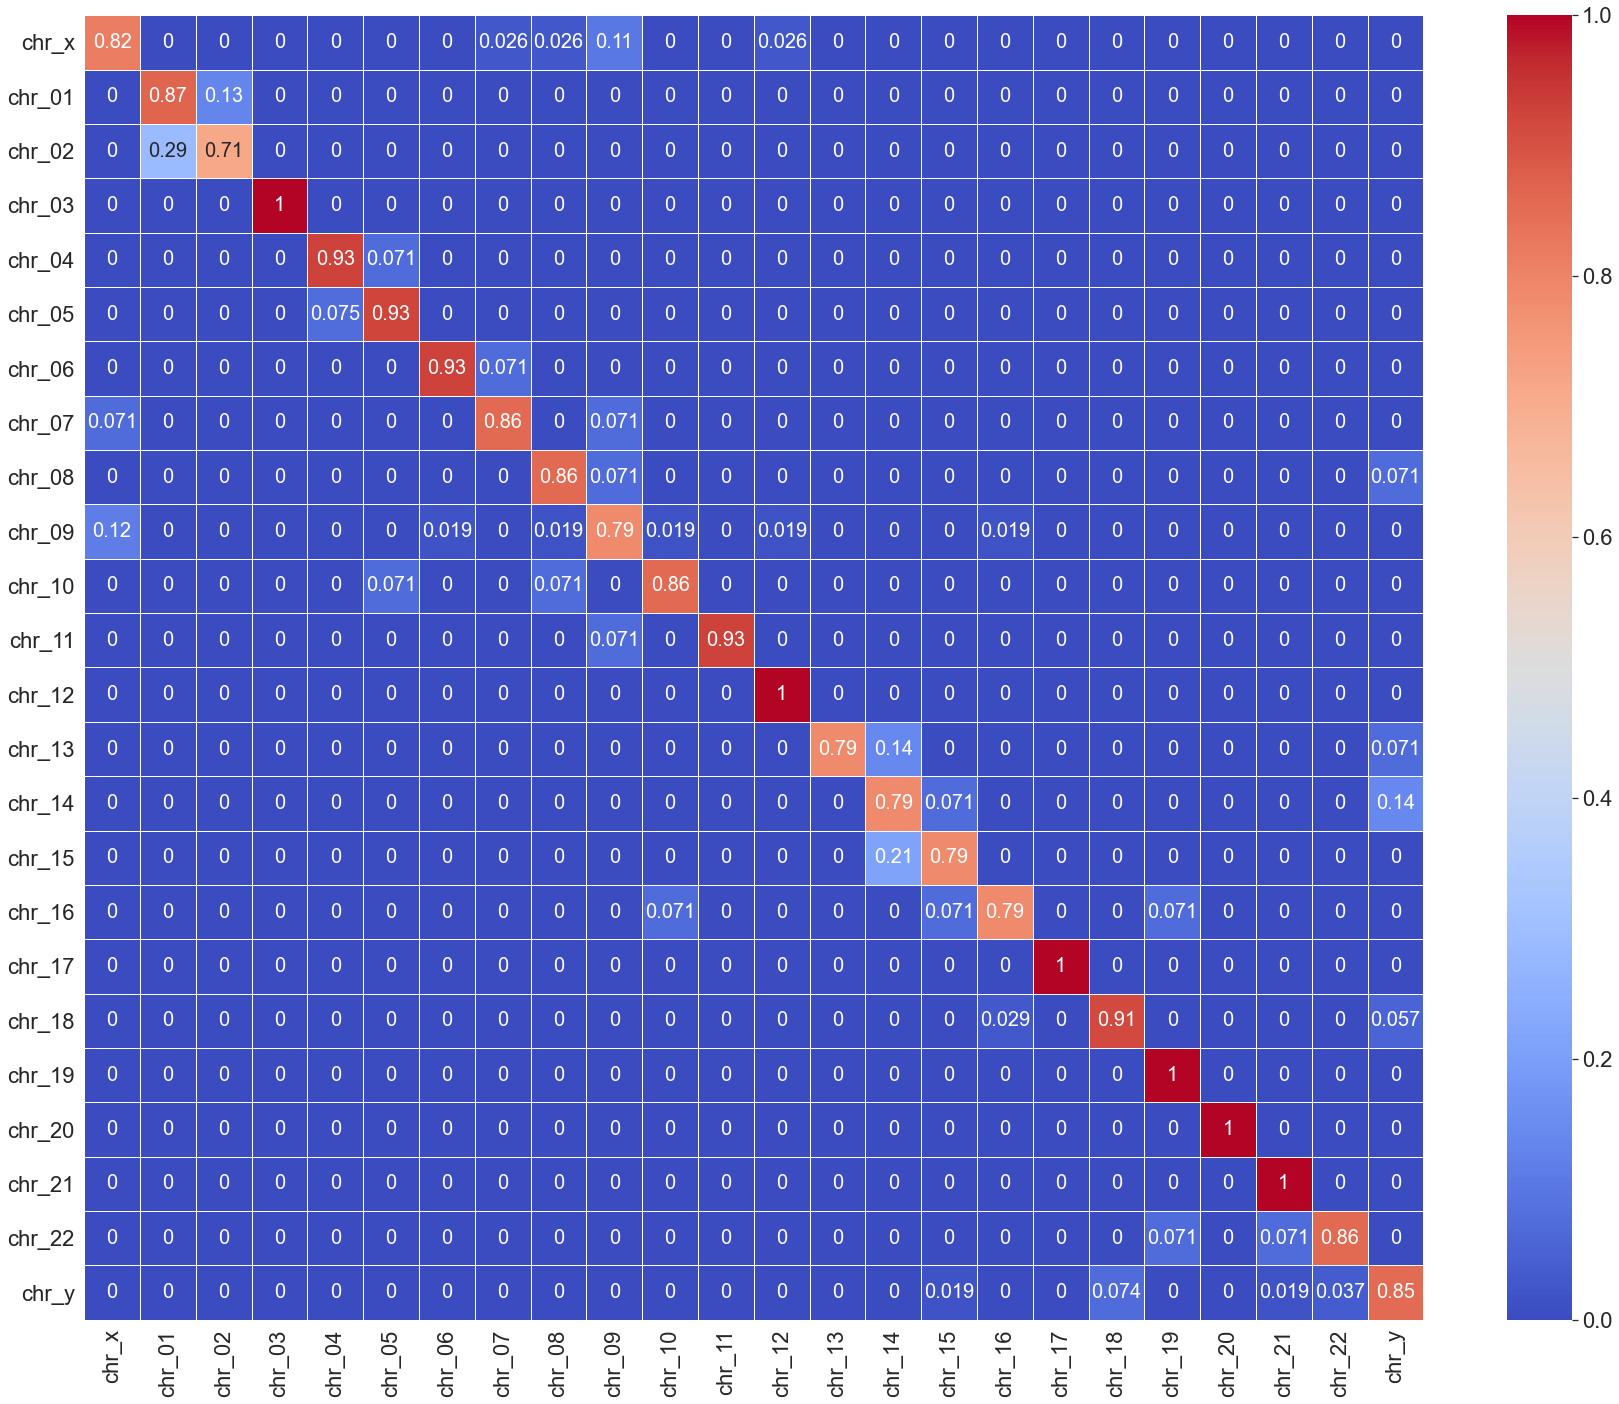

In [50]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [51]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Iteration_' + str(iterationNumber) + '.png', dpi=400)

In [52]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Rate_Iteration_' + str(iterationNumber) + '.png', dpi=400)

# Results

In [53]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.874


In [54]:
print(performanceReport)

              precision    recall  f1-score   support

       chr_x       0.82      0.82      0.82        38
      chr_01       0.76      0.87      0.81        15
      chr_02       0.83      0.71      0.77        14
      chr_03       1.00      1.00      1.00        14
      chr_04       0.81      0.93      0.87        14
      chr_05       0.95      0.93      0.94        40
      chr_06       0.93      0.93      0.93        14
      chr_07       0.86      0.86      0.86        14
      chr_08       0.80      0.86      0.83        14
      chr_09       0.85      0.79      0.82        52
      chr_10       0.86      0.86      0.86        14
      chr_11       1.00      0.93      0.96        14
      chr_12       0.88      1.00      0.93        14
      chr_13       1.00      0.79      0.88        14
      chr_14       0.69      0.79      0.73        14
      chr_15       0.79      0.79      0.79        14
      chr_16       0.85      0.79      0.81        14
      chr_17       1.00    

In [55]:
type(performanceReport)

str

In [56]:
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_14,chr_15,chr_16,chr_17,chr_18,chr_19,chr_20,chr_21,chr_22,chr_y
chr_x,31,0,0,0,0,0,0,1,1,4,...,0,0,0,0,0,0,0,0,0,0
chr_01,0,13,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,0,4,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_04,0,0,0,0,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,0,0,0,0,3,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_06,0,0,0,0,0,0,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_07,1,0,0,0,0,0,0,12,0,1,...,0,0,0,0,0,0,0,0,0,0
chr_08,0,0,0,0,0,0,0,0,12,1,...,0,0,0,0,0,0,0,0,0,1
chr_09,6,0,0,0,0,0,1,0,1,41,...,0,0,1,0,0,0,0,0,0,0


## Export to a text file

In [57]:
file_report = open('Results_'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()